In [84]:
from __future__ import print_function
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
#from sklearn import metrics
from sklearn.metrics import confusion_matrix
#import seaborn as sns
import re
import numpy as np
import imutils
import cv2
%matplotlib inline

In [3]:
#Loading the MNIST sample data- provided with scikit learn
mnist = datasets.load_digits()

In [11]:
#Creating Trainig and Testing set-
(train_data,test_data,train_labels,test_labels) = train_test_split(np.array(mnist.data),
                                                mnist.target,test_size=0.25,random_state=42)

In [12]:
#Create Validation set from training data:
(train_data,validation_data,train_labels,validation_labels) = train_test_split(train_data,
                                                train_labels,test_size=0.1,random_state=82)

In [13]:
#Let's check the dataset dims:
print("Training Data: {}".format(len(train_labels)))
print("Validation Data: {}".format(len(validation_labels)))
print("Test Data: {}".format(len(test_labels)))

Training Data: 1212
Validation Data: 135
Test Data: 450


In [34]:
#Training the model - 
k_val = range(1,32,2) # We take odd values for k
accuracy=[]

for k in k_val:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(train_data,train_labels)
    
    #Evaluate on validation set:
    score = knn_model.score(validation_data,validation_labels)
    print("k=%d , accuracy=%.2f" %(k,score*100))
    accuracy.append(score)
# Finding the best K value for highest accuracy without overfit and high bias-
i = np.argmax(accuracy)
print("k=%d has the highest accuracy of %.2f with optimal complexity"%(k_val[i],accuracy[i]*100))

k=1 , accuracy=98.52
k=3 , accuracy=97.04
k=5 , accuracy=97.78
k=7 , accuracy=98.52
k=9 , accuracy=97.78
k=11 , accuracy=97.78
k=13 , accuracy=97.04
k=15 , accuracy=97.04
k=17 , accuracy=96.30
k=19 , accuracy=96.30
k=21 , accuracy=95.56
k=23 , accuracy=95.56
k=25 , accuracy=95.56
k=27 , accuracy=95.56
k=29 , accuracy=95.56
k=31 , accuracy=95.56
k=1 has the highest accuracy of 98.52 with optimal complexity


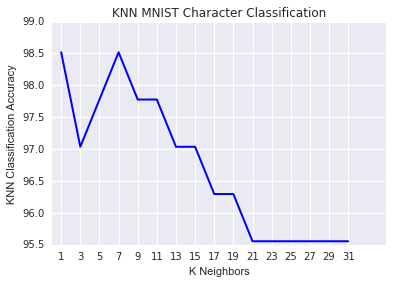

In [85]:
# or just plot it-
from matplotlib import pyplot as plt
accuracy_prec = [j*100 for j in accuracy]
plt.plot(k_val,accuracy_prec,color='b',linewidth=2.0)
plt.xticks(np.arange(1, 32, 2))
plt.xlabel("K Neighbors")
plt.ylabel("KNN Classification Accuracy")
plt.title("KNN MNIST Character Classification")
plt.show()

In [86]:
# Evaluate on test data- 
model = KNeighborsClassifier(n_neighbors=k_val[i])
model.fit(train_data,train_labels)
predictions = model.predict(test_data)

print("Evaluation on Test Data -")
print(classification_report(test_labels,predictions))

Evaluation on Test Data -
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        43
          1       0.95      1.00      0.97        37
          2       1.00      1.00      1.00        38
          3       0.98      0.98      0.98        46
          4       0.98      0.98      0.98        55
          5       1.00      1.00      1.00        59
          6       1.00      1.00      1.00        45
          7       1.00      0.98      0.99        41
          8       0.97      0.97      0.97        38
          9       0.98      0.96      0.97        48

avg / total       0.99      0.99      0.99       450



In [87]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='bicubic', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(mnist.target_names))
    plt.xticks(tick_marks, mnist.target_names, rotation=45)
    plt.yticks(tick_marks, mnist.target_names)
   # plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


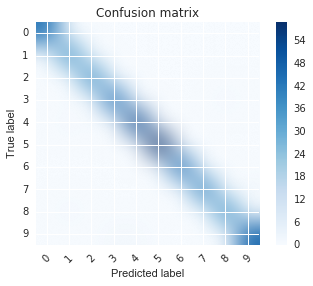

In [88]:
cm = confusion_matrix(test_labels,predictions)
plot_confusion_matrix(cm)

In [89]:
for i in np.random.randint(0, high=len(test_labels), size=(3,)):
	# grab the image and classify it
	image = test_data[i]
	prediction = model.predict(image)[0]
 
	# convert the image for a 64-dim array to an 8 x 8 image compatible with OpenCV,
	# then resize it to 32 x 32 pixels so we can see it better
	image = image.reshape((8, 8)).astype("uint8")
	image = exposure.rescale_intensity(image, out_range=(0, 255))
	image = imutils.resize(image, width=32, inter=cv2.INTER_CUBIC)
 
	# show the prediction
	print("I think that digit is: {}".format(prediction))
	cv2.imshow("Image", image)
	cv2.waitKey(0)

/Users/ankitrai/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:397: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/ankitrai/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:397: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


I think that digit is: 2
I think that digit is: 5
I think that digit is: 9


/Users/ankitrai/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:397: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
